<a href="https://colab.research.google.com/github/srivatsankr/AXDemo/blob/master/Draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Libraries & Dataset

In [1]:
import pandas as pd # To import pandas
import numpy as np #To import numpy
import seaborn as sns #To import seborn for visualization
!pip install -U seaborn-image
import seaborn_image as isns
!pip install opencv-python --user
!pip install python-mnist
!pip install idx2numpy
!pip install graphviz
#import featurestools
%matplotlib notebook
%matplotlib inline 
import matplotlib.pyplot as plt # for visualizng
from mpl_toolkits.mplot3d import axes3d # for 3d visualzing
import warnings # not to show warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
#from keras.layers import keral_regularizer
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from IPython.display import SVG
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # to split data for training and testing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Confusion matrix visualizing
from sklearn.metrics import classification_report # detailed report
from sklearn.metrics import accuracy_score # to find accuracy of model
from keras.utils.vis_utils import model_to_dot
import cv2
import idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=71384c49339e499e3e74079b0aa23f5a5929f6aa7677b334e379e2f0b1e683b2
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#checking if gpu is enabled
#Ensure the gpu is enabled in runtime type section
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:

#Downloading the required data from given file directory. 
#The gz format has to be unzipped and the path location is given below. We used Gdrive
#idx2numpy package provides a tool for converting files to and from IDX format to numpy.ndarray format

file1 = '/content/drive/MyDrive/Colab Notebooks/fashion/t10k-images-idx3-ubyte'
x_test = idx2numpy.convert_from_file(file1)

file2 = '/content/drive/MyDrive/Colab Notebooks/fashion/t10k-labels-idx1-ubyte'
#file2 = 't10k-labels-idx1-ubyte'
y_test = idx2numpy.convert_from_file(file2)

file3 = "/content/drive/MyDrive/Colab Notebooks/fashion/train-images-idx3-ubyte"
# file3 = "train-images-idx3-ubyte"
x_train = idx2numpy.convert_from_file(file3)

file4 = "/content/drive/MyDrive/Colab Notebooks/fashion/train-labels-idx1-ubyte"
# file4 = "train-labels-idx1-ubyte"
y_train = idx2numpy.convert_from_file(file4)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x_train.dtype

dtype('uint8')

In [7]:
#TAKE
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
num_classes=10

### 2. Data Visualization and Augmentation

2.1 Plot 2 samples from each

In [8]:
#TAKE
threesampleDataImagestoPrint = {}
for i in range(60000):  
  # print(y_train[i])
  if y_train[i] in threesampleDataImagestoPrint:
        if(len(threesampleDataImagestoPrint[y_train[i]]) <= 2):
          threesampleDataImagestoPrint[y_train[i]].append(i)        
  else:
       threesampleDataImagestoPrint[y_train[i]] = [i]

threesampleDataImagestoPrint = {k : threesampleDataImagestoPrint[k] for k in sorted(threesampleDataImagestoPrint)}
print(threesampleDataImagestoPrint)

{0: [1, 2, 4], 1: [16, 21, 38], 2: [5, 7, 27], 3: [3, 20, 25], 4: [19, 22, 24], 5: [8, 9, 12], 6: [18, 32, 33], 7: [6, 14, 41], 8: [23, 35, 57], 9: [0, 11, 15]}


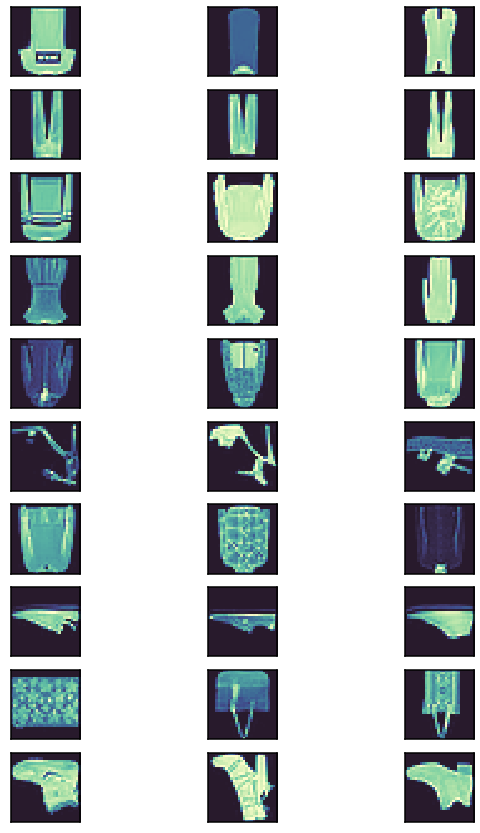

In [26]:
#TAKE
fig = plt.figure(figsize=(10, 15))
columns = 3
rows = 10
imagekey = 1
for key in threesampleDataImagestoPrint:
  keyforsubplot = key + 1
  #print(keyforsubplot)
  values = threesampleDataImagestoPrint[key] 
  for eachValue in values:
    ax = fig.add_subplot(rows, columns, imagekey)
    imagekey = imagekey + 1
    image = x_train[eachValue].reshape(1,28,28,1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[eachValue])

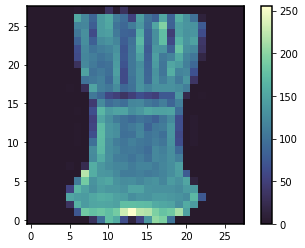

In [23]:
plt.imshow(x_train[3])
plt.colorbar()

In [ ]:
#-1 means that the length in that dimension is inferred. 
#This is done based on the constraint that the number of elements in an ndarray or Tensor when reshaped must remain the same.
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

#plt.imshow(x_train[0])


In [ ]:
######
#need to sort this out!
#fig , axes = plt.subplots(4,4 , figsize = (15,15))

 #for row in axes:
   #for axe in row:
     index = np.random.randint(60000)
     #img = df.drop("label", axis=1).values[index].reshape(28,28)
     #cloths = df["label"][index]
     #axe.imshow(img)
     #axe.set_title(clothing[cloths])
     #axe.set_axis_off()
######

IndentationError: ignored

### 2.2 Applying Rotation and Height Shift Augmentation

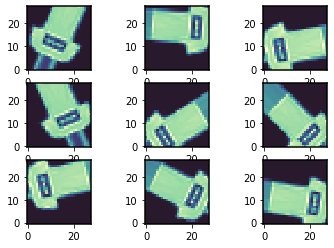

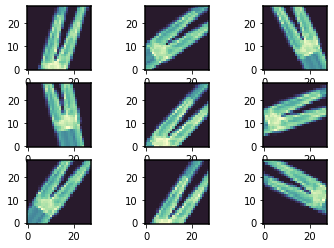

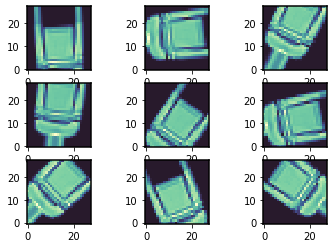

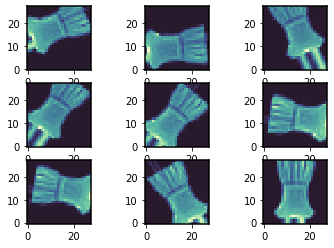

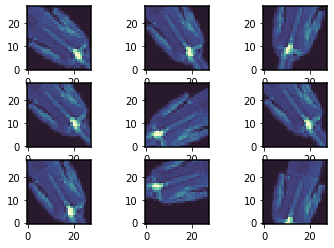

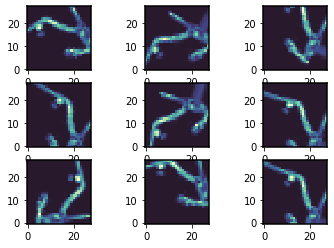

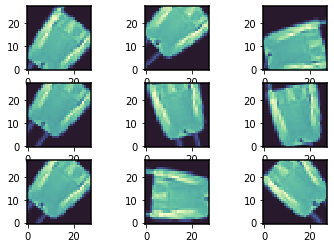

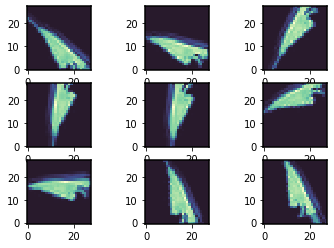

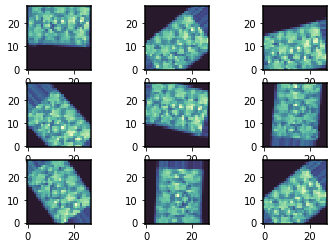

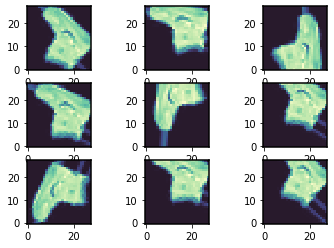

In [47]:
#TAKE
for key in threesampleDataImagestoPrint:
  imagekey = threesampleDataImagestoPrint[key][0]
  image = np.expand_dims(x_train[imagekey], 0)
  image = image.reshape(1,28,28,1)
  datagen = ImageDataGenerator(rotation_range=90,height_shift_range=0.25)
  datagen.fit(x_train[1].reshape(1, 28, 28, 1))
  it = datagen.flow(image, batch_size=1)

 
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(np.squeeze(image))
    # show the figure    
  plt.show()

(-0.5, 27.5, 27.5, -0.5)

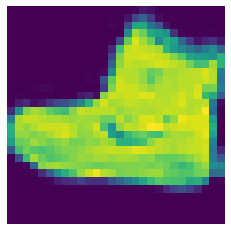

In [ ]:
# NEED TO MAKE THIS A LOOP TO PULL IN ALL CLASSES

#Model 2 sample

image = x_train[0]
image = np.expand_dims(image, axis=0)
image = image.reshape(1,28,28,1)
image.shape

datagen = ImageDataGenerator(rotation_range=90,height_shift_range=0.3)
img = datagen.flow(image, batch_size=1)

image = next(img)[0].astype('uint8')
#plt.imshow(image)
plt.imshow(np.squeeze(image))
plt.axis('off')

2.3 Making train and test data in required format

In [ ]:
#FeaturesDict({
#    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
#    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
#})

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train.ndim

1

In [ ]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.
# adjusting to required shape
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# one hot encode target values
y_train1 = to_categorical(y_train, num_classes)
y_test1 = to_categorical(y_test, num_classes)

In [ ]:
# reshaping X data: (n, 28, 28) => (n, 784)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

#scaling with Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

2.4 Print the shape of train and test data

In [ ]:
#checking shape of given data

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train1.shape)
print(y_test1.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_train1)


array([0., 1.], dtype=float32)

### 3. Model Building

3.1 Sequential Model Layer

Simplest way to create a deep learning model in Keras is utilizing Sequential Model API

Sequential Model API only enables connecting layers sequentially, hence it is "a linear stack of layers"

Hence, it is effective to use when creating a "simple" model with a single output such as MLPs

In [ ]:
#x_train.shape

(60000, 784)

In [ ]:
#x_train.shape[1:]

(784,)

In [ ]:
#?Sequential

In [ ]:
#from tensorflow.keras import regularizers


In [ ]:

#model = Sequential()
#model.add(Dense(10, kernel_regularizer= 'l2',input_shape = x_train.shape[1:], activation = 'elu', name = 'First_hidden_layer'))
#model.add(regularizers.l2(0.001))

#model.add(Dense(10, kernel_regularizer= regularizers.l2(0.001),activation = 'relu', name = 'Second_hidden_layer'))
#model.add(Dropout(0.2))

#model.add(Dense(20,kernel_regularizer= regularizers.l2(0.001), activation = 'relu', name = 'Third_hidden_layer'))

#model.add(Dense(40,kernel_regularizer= regularizers.l2(0.001), activation = 'relu', name = 'Fourth_hidden_layer'))
#model.add(Dropout(0.2))

#model.add(Dense(10, activation = 'softmax', name = 'Output_layer'))

#model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 10)                7850      
                                                                 
 Second_hidden_layer (Dense)  (None, 10)               110       
                                                                 
 dropout_18 (Dropout)        (None, 10)                0         
                                                                 
 Third_hidden_layer (Dense)  (None, 20)                220       
                                                                 
 Fourth_hidden_layer (Dense)  (None, 40)               840       
                                                                 
 dropout_19 (Dropout)        (None, 40)                0         
                                                                 
 Output_layer (Dense)        (None, 10)              

In [ ]:
model = Sequential()
model.add(Dense(100, kernel_regularizer= 'l2',input_shape = x_train.shape[1:], activation = 'elu', name = 'First_hidden_layer'))
#model.add(regularizers.l2(0.01))

model.add(Dense(100, kernel_regularizer= regularizers.l2(0.01),activation = 'relu', name = 'Second_hidden_layer'))
model.add(Dropout(0.3))

model.add(Dense(100,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Third_hidden_layer'))

model.add(Dense(100,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Fourth_hidden_layer'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax', name = 'Output_layer'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 100)               78500     
                                                                 
 Second_hidden_layer (Dense)  (None, 100)              10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 Third_hidden_layer (Dense)  (None, 100)               10100     
                                                                 
 Fourth_hidden_layer (Dense)  (None, 100)              10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 Output_layer (Dense)        (None, 10)               

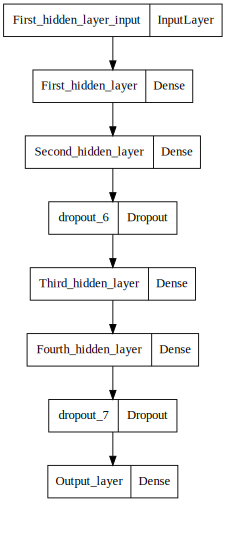

In [ ]:
SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))

4. Model Compilation

In [ ]:
#from tensorflow.keras import optimizers

In [ ]:
#can use adam optimizer for multiclass classifcation for better results
adam = optimizers.Adam(lr = 0.00001)
#sgd = optimizers.SGD(lr = 0.05, momentum=.1)    # stochastic gradient descent optimizer

# Lets use categorical cross entropy as loss dunction since it works best for multi class classification
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

5. Model Training

In [ ]:
y_train1.shape

(60000, 10)

In [ ]:
#train1_1 = model.fit(x_train, y_train, batch_size = 100, epochs = 100, verbose = 1)

#train1 = model.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=100, batch_size=100, verbose=1)

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 6.7385 - accuracy: 0.1693 - val_loss: 6.3414 - val_accuracy: 0.4332
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 6.0867 - accuracy: 0.3855 - val_loss: 5.6258 - val_accuracy: 0.6158
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 5.4776 - accuracy: 0.5109 - val_loss: 5.0348 - val_accuracy: 0.6253
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 4.9832 - accuracy: 0.5636 - val_loss: 4.6006 - val_accuracy: 0.6408
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 4.6034 - accuracy: 0.5929 - val_loss: 4.2673 - val_accuracy: 0.6583
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 4.2932 - accuracy: 0.6137 - val_loss: 3.9930 - val_accuracy: 0.6733
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 4.0334 - accuracy: 0.6311 - val_loss: 3.7564 - val_accuracy: 0.6882

In [ ]:
train11 = model.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=60, batch_size=50, verbose=1)

Epoch 1/60
1200/1200 [==============================] - 5s 3ms/step - loss: 6.4535 - accuracy: 0.2928 - val_loss: 5.6650 - val_accuracy: 0.5741
Epoch 2/60
1200/1200 [==============================] - 4s 3ms/step - loss: 5.3472 - accuracy: 0.5039 - val_loss: 4.7854 - val_accuracy: 0.6619
Epoch 3/60
1200/1200 [==============================] - 4s 3ms/step - loss: 4.6753 - accuracy: 0.5838 - val_loss: 4.2471 - val_accuracy: 0.6821
Epoch 4/60
1200/1200 [==============================] - 4s 3ms/step - loss: 4.1859 - accuracy: 0.6232 - val_loss: 3.8305 - val_accuracy: 0.7022
Epoch 5/60
1200/1200 [==============================] - 4s 3ms/step - loss: 3.7932 - accuracy: 0.6523 - val_loss: 3.4854 - val_accuracy: 0.7216
Epoch 6/60
1200/1200 [==============================] - 4s 3ms/step - loss: 3.4641 - accuracy: 0.6745 - val_loss: 3.1916 - val_accuracy: 0.7421
Epoch 7/60
1200/1200 [==============================] - 4s 3ms/step - loss: 3.1857 - accuracy: 0.6955 - val_loss: 2.9412 - val_accuracy:

In [ ]:
#train12 = model.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=100, batch_size=50, verbose=1)

5.1 Plot the loss and accuracy history graph

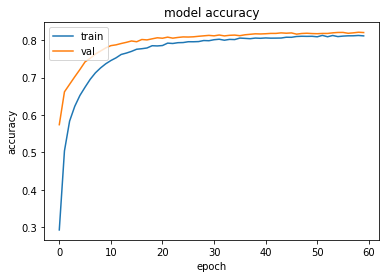

In [ ]:
history = train11

# Plotting the accuracy for train and validation set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

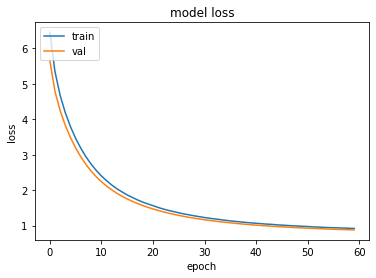

In [ ]:
# Plotting the reduction in loss value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

6. Model Evaluation

6.1 Train and Validation Loss and Accuracy

In [ ]:
train_results = model.evaluate(x_train, y_train1)
test_results = model.evaluate(x_test, y_test1)

313/313 [==============================] - 1s 3ms/step - loss: 0.8779 - accuracy: 0.8204


In [ ]:
print(model.metrics_names)     # list of metric names the model is employing
print("Training: ",train_results,"\nTest: ",test_results)    # actual figure of metrics computed

['loss', 'accuracy']
Training:  [0.8510851860046387, 0.8320833444595337] 
Test:  [0.877942681312561, 0.8203999996185303]


6.2 Confusion Matrix

In [ ]:
#y_pred = model.predict(x_test)

#

In [ ]:
#y_test_arg=np.argmax(y_test1,axis=1)
#y_pred = np.argmax(model.predict(X_test),axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(y_test_arg, Y_pred))

In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1))
print("the accuracy_score of test split : {}".format(accuracy_score(y_test, y_pred)))

the accuracy_score of test split : 0.8204


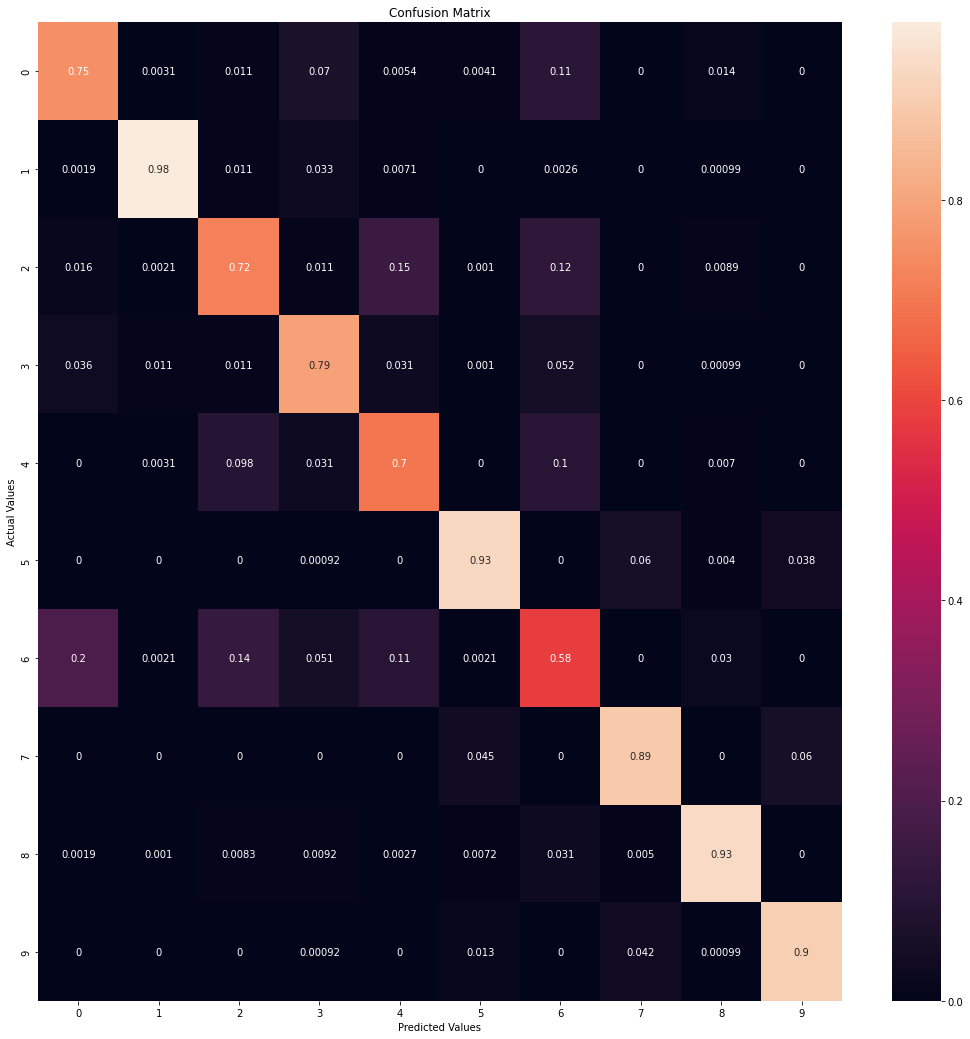

In [ ]:


plt.figure(figsize=(18,18))
conf_matrix = confusion_matrix(y_test, y_pred, normalize= 'pred')
sns.heatmap(conf_matrix, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

6.3  Classification Report

In [ ]:
# Printing Classification Report
class_rpt1 = classification_report(y_test, y_pred)
print(class_rpt1)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1000
           1       0.98      0.94      0.96      1000
           2       0.72      0.70      0.71      1000
           3       0.79      0.86      0.83      1000
           4       0.70      0.78      0.74      1000
           5       0.93      0.90      0.91      1000
           6       0.58      0.45      0.51      1000
           7       0.89      0.89      0.89      1000
           8       0.93      0.94      0.94      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



6.4 Two most incorrectly classified images

### NEED TO DO THIS

7 HyperParameter Tuning 

7.1 Changing Network Depth

In [ ]:
# Model Building - Different hidden layers and hidden units

model2 = Sequential()
model2.add(Dense(150, kernel_regularizer= regularizers.l2(0.01),input_shape = x_train.shape[1:], activation = 'elu', name = 'First_hidden_layer'))
#model.add(regularizers.l2(0.01))

model2.add(Dense(150, kernel_regularizer= regularizers.l2(0.01),activation = 'relu', name = 'Second_hidden_layer'))
model.add(Dropout(0.3))

model2.add(Dense(150,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Third_hidden_layer'))

model2.add(Dense(150,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Fourth_hidden_layer'))
model2.add(Dropout(0.3))

model2.add(Dense(150,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Fifth_hidden_layer'))

model2.add(Dense(150,kernel_regularizer= regularizers.l2(0.01), activation = 'relu', name = 'Sixth_hidden_layer'))
model2.add(Dropout(0.3))

model2.add(Dense(10, activation = 'softmax', name = 'Output_layer'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 150)               117750    
                                                                 
 Second_hidden_layer (Dense)  (None, 150)              22650     
                                                                 
 Third_hidden_layer (Dense)  (None, 150)               22650     
                                                                 
 Fourth_hidden_layer (Dense)  (None, 150)              22650     
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 Fifth_hidden_layer (Dense)  (None, 150)               22650     
                                                                 
 Sixth_hidden_layer (Dense)  (None, 150)              

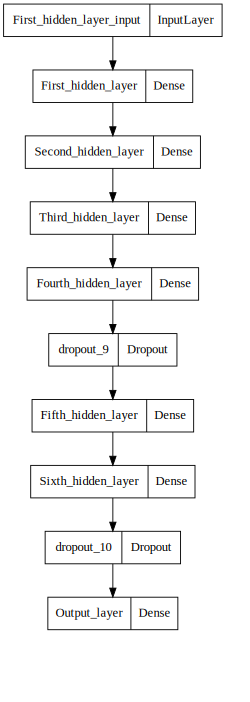

In [ ]:
SVG(model_to_dot(model2, dpi=65).create(prog='dot', format='svg'))

In [ ]:
# Model Compilation

#can use adam optimizer for multiclass classifcation for better results
adam = optimizers.Adam(lr = 0.0001)
#sgd = optimizers.SGD(lr = 0.05, momentum=.1)    # stochastic gradient descent optimizer

# Lets use categorical cross entropy as loss dunction since it works best for multi class classification
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Model Training

train21 = model2.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=60, batch_size=50, verbose=1)

Epoch 1/60
1200/1200 [==============================] - 6s 4ms/step - loss: 5.9286 - accuracy: 0.6311 - val_loss: 3.1254 - val_accuracy: 0.7773
Epoch 2/60
1200/1200 [==============================] - 4s 4ms/step - loss: 2.4392 - accuracy: 0.7713 - val_loss: 1.8825 - val_accuracy: 0.8051
Epoch 3/60
1200/1200 [==============================] - 4s 4ms/step - loss: 1.6681 - accuracy: 0.7922 - val_loss: 1.4240 - val_accuracy: 0.8070
Epoch 4/60
1200/1200 [==============================] - 5s 4ms/step - loss: 1.3387 - accuracy: 0.7994 - val_loss: 1.2006 - val_accuracy: 0.8108
Epoch 5/60
1200/1200 [==============================] - 4s 4ms/step - loss: 1.1684 - accuracy: 0.8026 - val_loss: 1.1053 - val_accuracy: 0.8004
Epoch 6/60
1200/1200 [==============================] - 4s 4ms/step - loss: 1.0671 - accuracy: 0.8079 - val_loss: 1.0104 - val_accuracy: 0.8116
Epoch 7/60
1200/1200 [==============================] - 5s 4ms/step - loss: 1.0076 - accuracy: 0.8108 - val_loss: 0.9589 - val_accuracy:

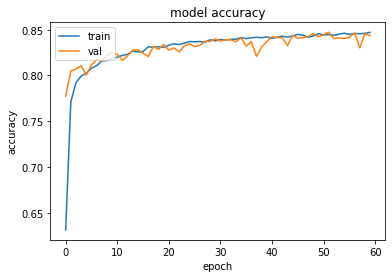

In [ ]:
# Plotting loss and accuracy history graph

history = train21

# Plotting the accuracy for train and validation set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

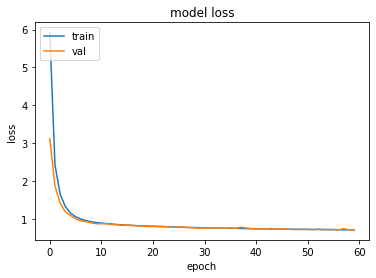

In [ ]:
# Plotting the reduction in loss value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Model Evaluation

train_results2 = model2.evaluate(x_train, y_train1)
test_results2 = model2.evaluate(x_test, y_test1)

print(model2.metrics_names)     # list of metric names the model is employing
print("Training: ",train_results2,"\nTest: ",test_results2)    # actual figure of metrics computed

313/313 [==============================] - 1s 3ms/step - loss: 0.7253 - accuracy: 0.8437
['loss', 'accuracy']
Training:  [0.6845520734786987, 0.8565499782562256] 
Test:  [0.725269615650177, 0.8436999917030334]


In [ ]:
# Confusion Matrix

y_pred2 = np.argmax(model2.predict(x_test),axis=1)
print("the accuracy_score of test split : {}".format(accuracy_score(y_test, y_pred2)))

the accuracy_score of test split : 0.8437


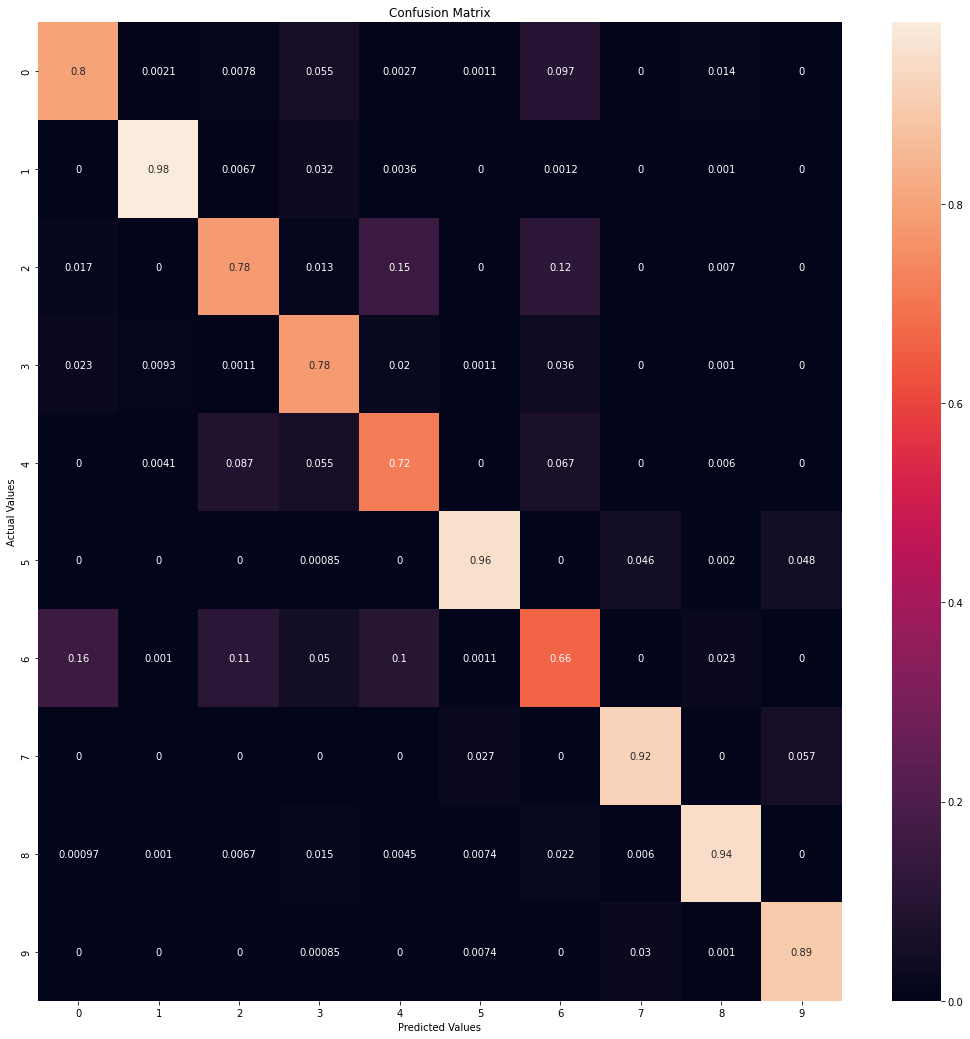

In [ ]:
plt.figure(figsize=(18,18))
conf_matrix2 = confusion_matrix(y_test, y_pred2, normalize= 'pred')
sns.heatmap(conf_matrix2, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Printing Classification Report
class_rpt2 = classification_report(y_test, y_pred2)
print(class_rpt2)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.78      0.70      0.74      1000
           3       0.78      0.91      0.84      1000
           4       0.72      0.79      0.75      1000
           5       0.96      0.90      0.93      1000
           6       0.66      0.54      0.60      1000
           7       0.92      0.91      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.89      0.96      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
## TWO MOST INCORRECTLY CLASSIFIED IMAGES

7.2 Model with no regularization

In [ ]:
# Model Building - with no regularization

model3 = Sequential()
model3.add(Dense(150,input_shape = x_train.shape[1:], activation = 'elu', name = 'First_hidden_layer'))

model3.add(Dense(150,activation = 'relu', name = 'Second_hidden_layer'))

model3.add(Dense(150,activation = 'relu', name = 'Third_hidden_layer'))

model3.add(Dense(150,activation = 'relu',name = 'Fourth_hidden_layer'))

model3.add(Dense(150, activation = 'relu', name = 'Fifth_hidden_layer'))

model3.add(Dense(10, activation = 'softmax', name = 'Output_layer'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 150)               117750    
                                                                 
 Second_hidden_layer (Dense)  (None, 150)              22650     
                                                                 
 Third_hidden_layer (Dense)  (None, 150)               22650     
                                                                 
 Fourth_hidden_layer (Dense)  (None, 150)              22650     
                                                                 
 Fifth_hidden_layer (Dense)  (None, 150)               22650     
                                                                 
 Output_layer (Dense)        (None, 10)                1510      
                                                                 
Total params: 209,860
Trainable params: 209,860
Non-tr

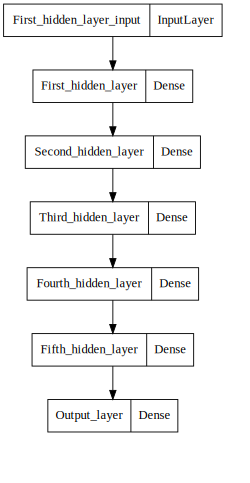

In [ ]:
SVG(model_to_dot(model3, dpi=65).create(prog='dot', format='svg'))

In [ ]:
# Model Compilation

#can use adam optimizer for multiclass classifcation for better results
adam = optimizers.Adam(lr = 0.0001)
#sgd = optimizers.SGD(lr = 0.05, momentum=.1)    # stochastic gradient descent optimizer

# Lets use categorical cross entropy as loss dunction since it works best for multi class classification
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Model Training

train31 = model3.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=60, batch_size=50, verbose=1)

Epoch 1/60
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6408 - accuracy: 0.7834 - val_loss: 0.4892 - val_accuracy: 0.8293
Epoch 2/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4226 - accuracy: 0.8491 - val_loss: 0.4353 - val_accuracy: 0.8398
Epoch 3/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3814 - accuracy: 0.8627 - val_loss: 0.3936 - val_accuracy: 0.8598
Epoch 4/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3547 - accuracy: 0.8711 - val_loss: 0.3964 - val_accuracy: 0.8585
Epoch 5/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3343 - accuracy: 0.8783 - val_loss: 0.3664 - val_accuracy: 0.8664
Epoch 6/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3203 - accuracy: 0.8820 - val_loss: 0.3665 - val_accuracy: 0.8680
Epoch 7/60
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8872 - val_loss: 0.3534 - val_accuracy:

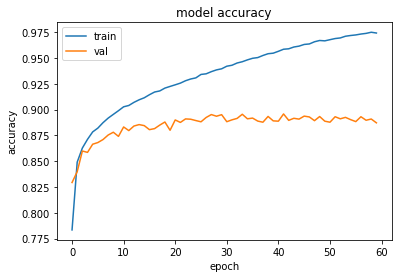

In [ ]:
# Plotting loss and accuracy history graph

history = train31

# Plotting the accuracy for train and validation set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

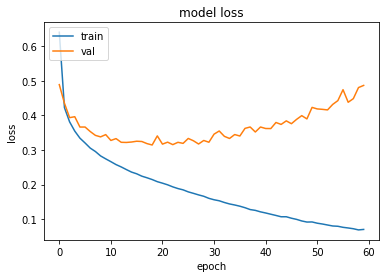

In [ ]:
# Plotting the reduction in loss value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Model Evaluation

train_results3 = model3.evaluate(x_train, y_train1)
test_results3 = model3.evaluate(x_test, y_test1)

print(model3.metrics_names)     # list of metric names the model is employing
print("Training: ",train_results3,"\nTest: ",test_results3)    # actual figure of metrics computed

313/313 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.8871
['loss', 'accuracy']
Training:  [0.0679483711719513, 0.9760333299636841] 
Test:  [0.48691949248313904, 0.8870999813079834]


In [ ]:
# Confusion Matrix

y_pred3 = np.argmax(model3.predict(x_test),axis=1)
print("the accuracy_score of test split : {}".format(accuracy_score(y_test, y_pred3)))

the accuracy_score of test split : 0.8871


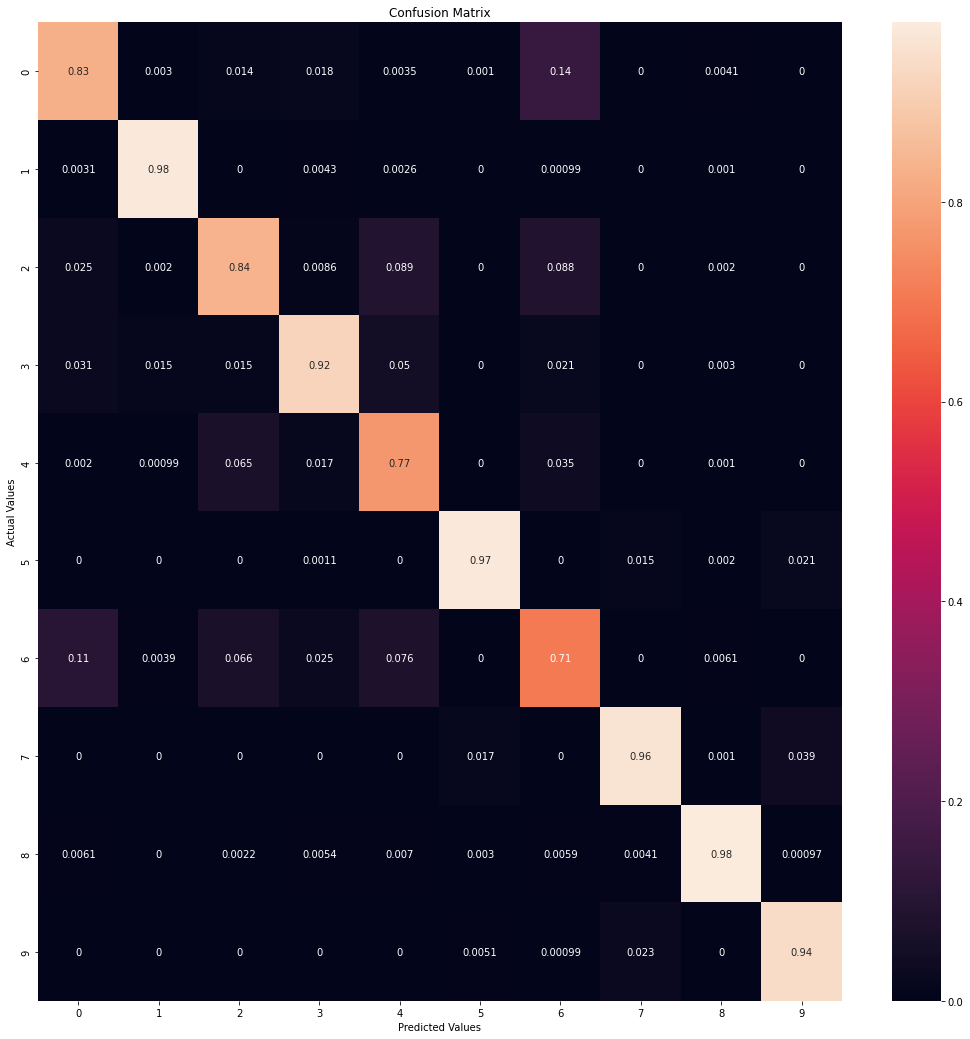

In [ ]:
plt.figure(figsize=(18,18))
conf_matrix3 = confusion_matrix(y_test, y_pred3, normalize= 'pred')
sns.heatmap(conf_matrix3, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Printing Classification Report
class_rpt3 = classification_report(y_test, y_pred3)
print(class_rpt3)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.99      0.98      1000
           2       0.84      0.77      0.80      1000
           3       0.92      0.86      0.89      1000
           4       0.77      0.89      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.71      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# PRINT THE TWO 